In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris 

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.rename(columns=lambda x: x.replace(' (cm)', '').replace(' ', '_'), inplace=True)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# проверяем типы данных в столбца и количество пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


<Axes: >

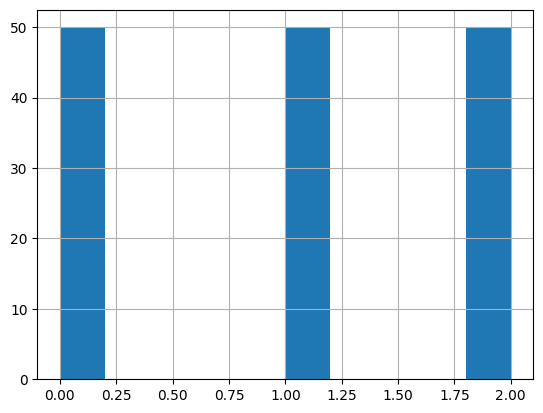

In [5]:
# проверяем данные на дисбаланс классов
df['species'].hist()

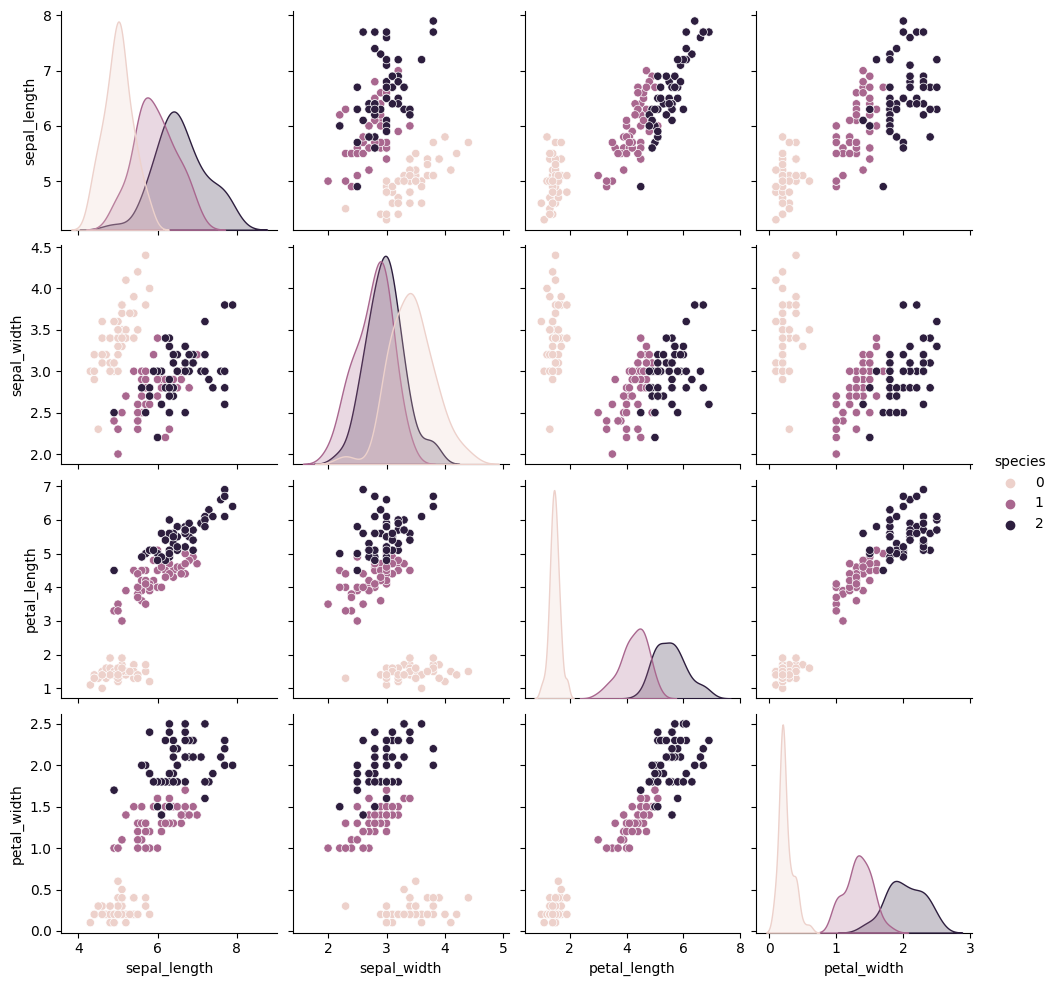

In [6]:
sns.pairplot(data=df, hue='species')

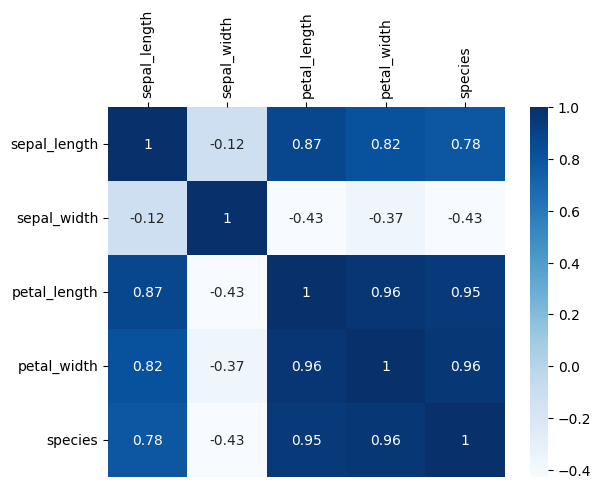

In [7]:
g = sns.heatmap(df.corr(), cmap="Blues", annot=True)
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [8]:
X = df.drop(['species'], axis = 1)
y = df['species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
clf = tree.DecisionTreeClassifier()

In [11]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 100)}

In [12]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [13]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)})

In [14]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [15]:
best_clf = grid_search_cv_clf.best_estimator_

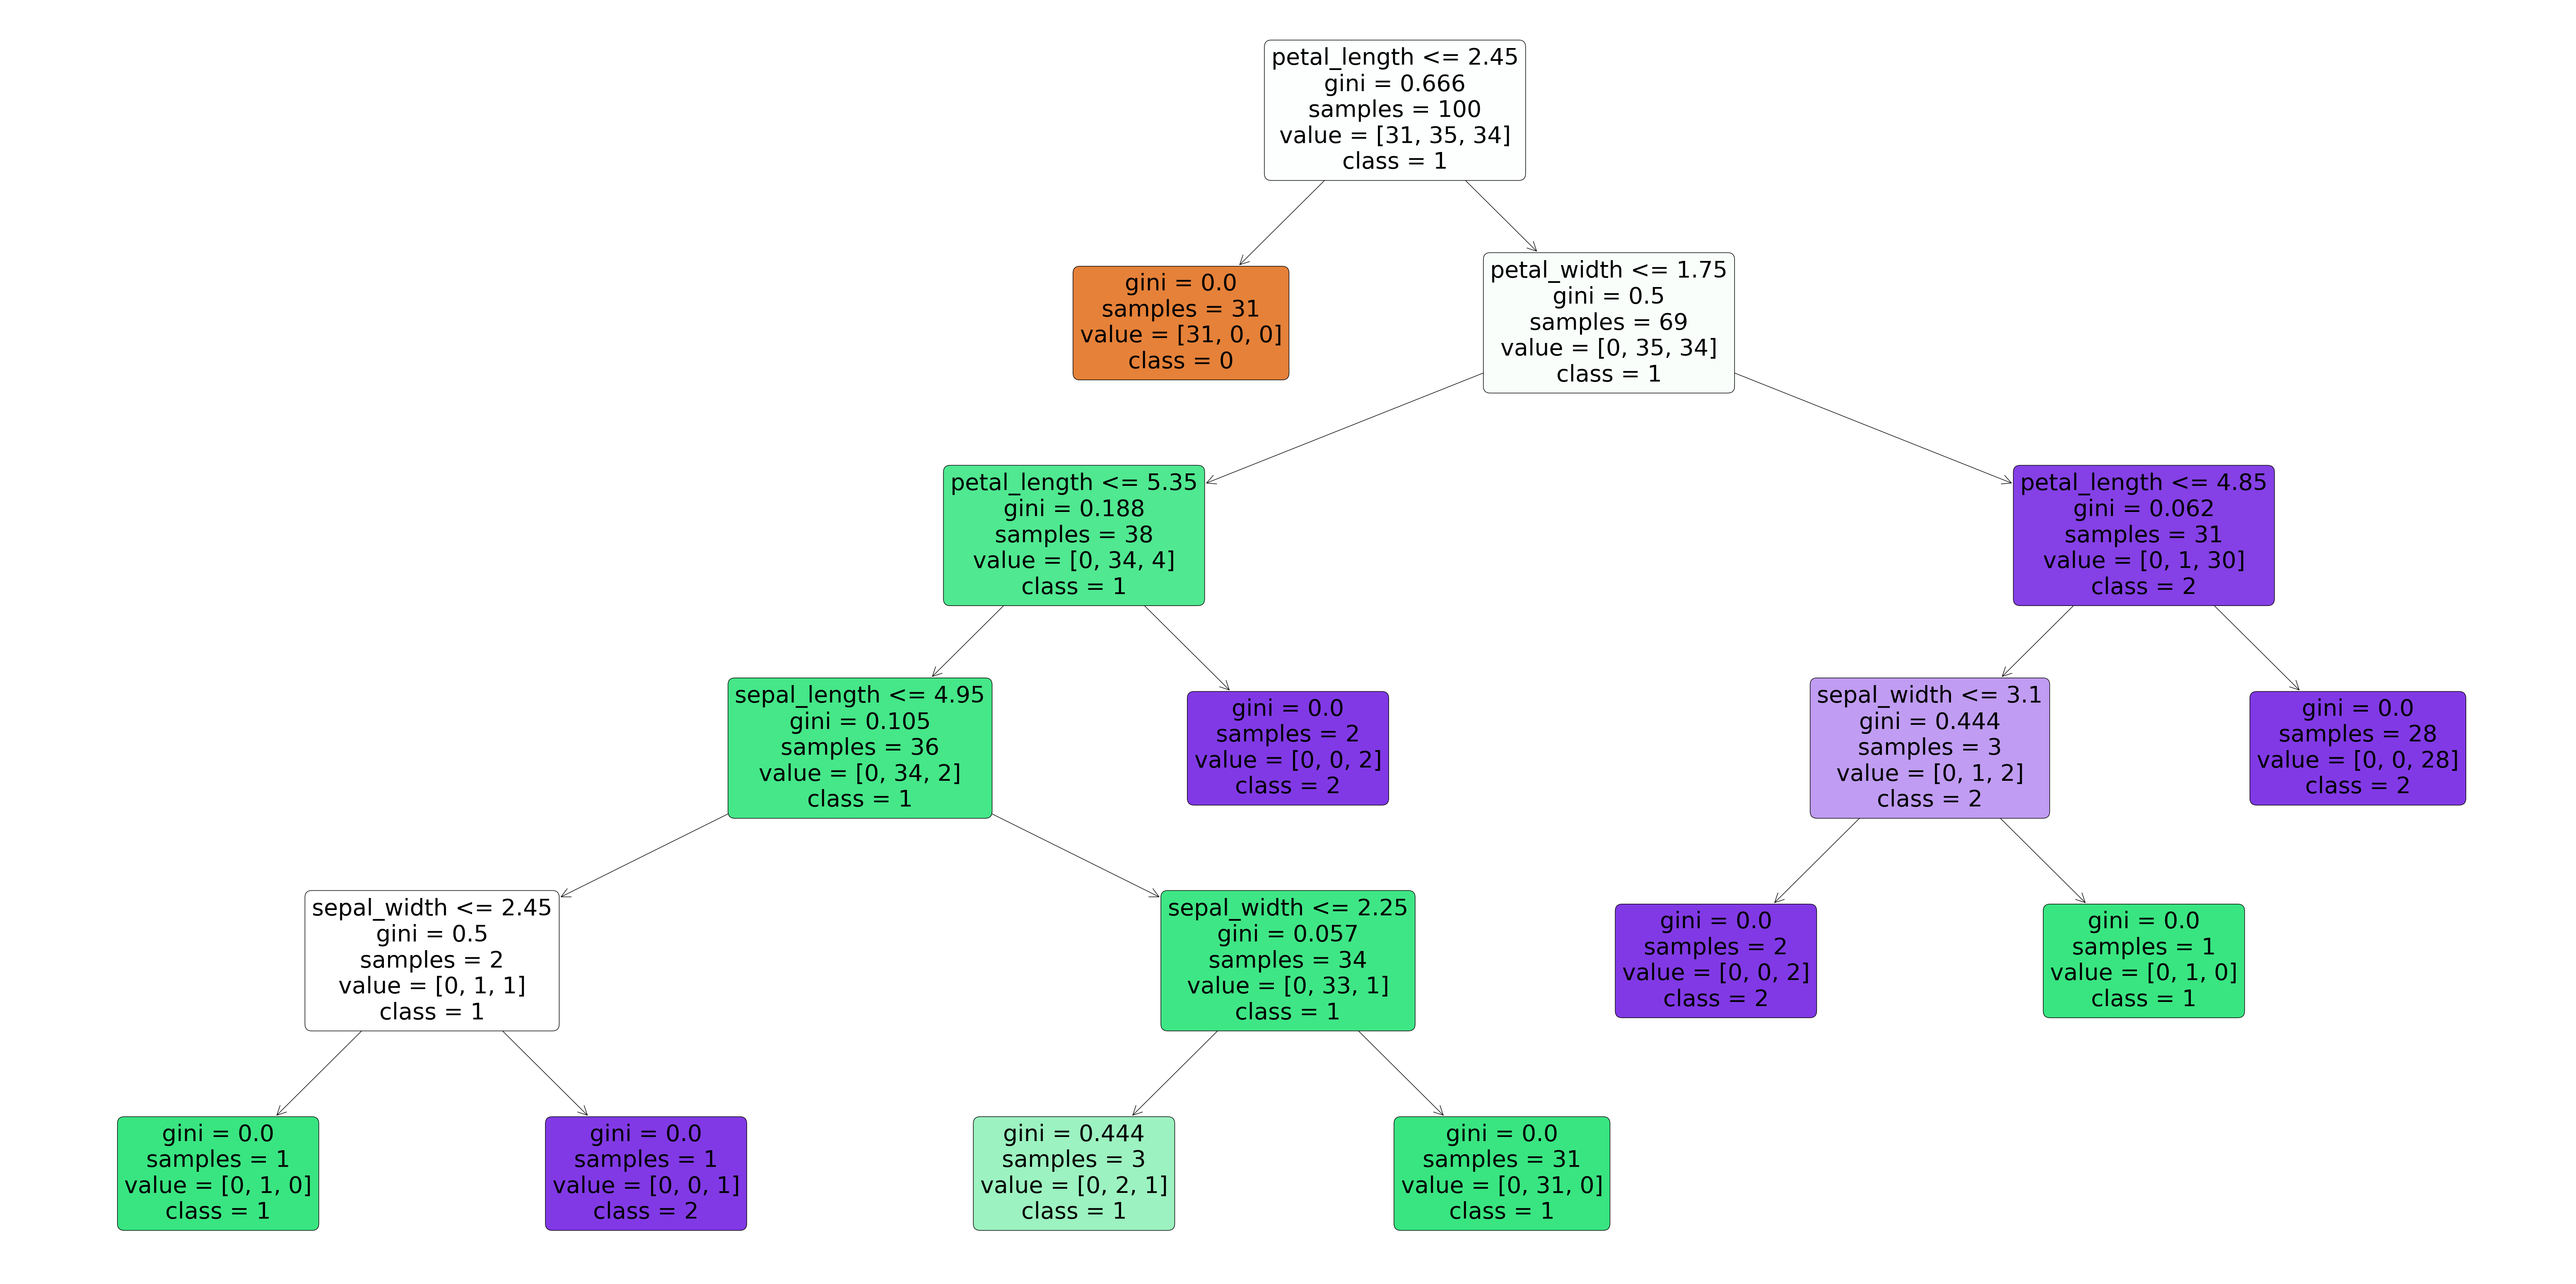

In [16]:
plt.figure(figsize=(80,40))
tree.plot_tree(best_clf, 
               feature_names=list(X_train), 
               class_names=['0', '1', '2'], 
               filled=True,
               rounded=True,
               fontsize = 40)
plt.show()

In [17]:
y_pred = best_clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.98